In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# importing dataset
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
# checking basic information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
# checking the statistics of numerical columns
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# checking the statistics of categorical columns
df.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


# Some Data Visualisation

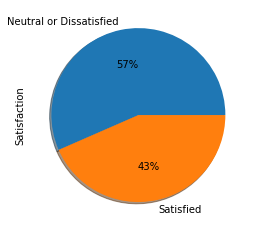

In [10]:
# target class distribution
df['Satisfaction'].value_counts().plot(kind='pie',autopct='%1.0f%%', shadow=True)
plt.show()

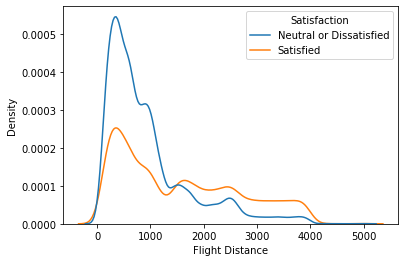

In [11]:
# distance vs satisfaction distribution
sns.kdeplot(df['Flight Distance'],hue=df['Satisfaction'])
plt.show()

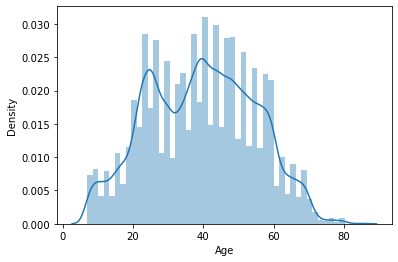

In [7]:
# age distribution
sns.distplot(df['Age'])
plt.show()

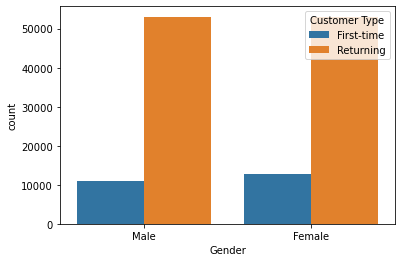

In [8]:
# gender vs customer type
sns.countplot(df['Gender'],hue=df['Customer Type'])
plt.show()

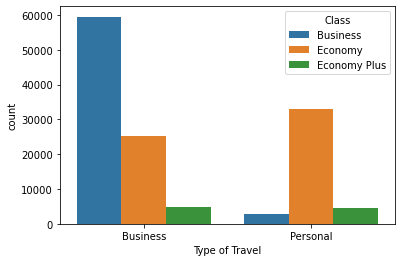

In [9]:
# type of travel vs class of travel
sns.countplot(df['Type of Travel'],hue=df['Class'])
plt.show()

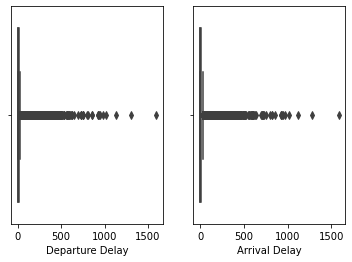

In [12]:
# checking outliers in Departure Delay & Arrival Delay
fig, ax = plt.subplots(1,2)
sns.boxplot(df['Departure Delay'],ax=ax[0])
sns.boxplot(df['Arrival Delay'],ax=ax[1])
fig.show()

In [13]:
## checking the skewness before transformation
df[['Departure Delay','Arrival Delay']].skew()

Departure Delay    6.821980
Arrival Delay      6.670125
dtype: float64

In [17]:
# handling outliers using square root transformation approach
df['Departure Delay'] = np.sqrt(df['Departure Delay'])
df['Arrival Delay'] = np.sqrt(df['Arrival Delay'])

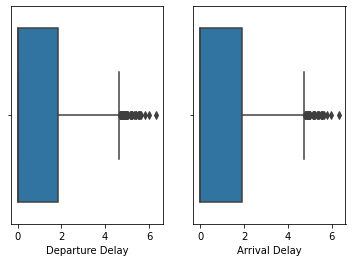

In [18]:
fig, ax = plt.subplots(1,2)
sns.boxplot(df['Departure Delay'],ax=ax[0])
sns.boxplot(df['Arrival Delay'],ax=ax[1])
fig.show()

In [19]:
## checking the skewness after transformation
df[['Departure Delay','Arrival Delay']].skew()

Departure Delay    0.781475
Arrival Delay      0.748728
dtype: float64

In [20]:
### data prep

In [21]:
# checking percentage of missing values
missing_values = df.isnull().sum()/len(df)*100
missing_values[missing_values>0]

Arrival Delay    0.302587
dtype: float64

In [22]:
## dropping missing values.
df.dropna(inplace=True)

In [23]:
## dropping redundant column
df.drop('ID',axis=1,inplace=True)

In [24]:
# modifying target class
df['Satisfaction'] = df['Satisfaction'].replace({'Neutral or Dissatisfied':1,'Satisfied':0})

In [25]:
## Checking unique values after encoding
df['Satisfaction'].unique()

array([1, 0], dtype=int64)

In [26]:
# categorial encoding
df = pd.get_dummies(df, columns= ['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first = True)

In [27]:
df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,821,1.189207,1.495349,3,3,4,3,3,3,...,5,3,5,5,1,1,0,0,0,0
1,35,821,2.258101,2.498999,2,2,3,5,2,5,...,5,2,5,5,0,0,1,0,0,0
2,41,853,0.000000,0.000000,4,4,4,5,4,3,...,3,4,3,3,0,1,1,0,0,0
3,50,1905,0.000000,0.000000,2,2,3,4,2,5,...,5,2,5,5,0,1,1,0,0,0
4,49,3470,0.000000,1.000000,3,3,3,5,3,3,...,3,3,3,3,0,0,1,0,0,0


In [28]:
# ditribution of target class and independent features
X = df.drop('Satisfaction',axis=1)
y = df['Satisfaction'] 

In [29]:
# splitting dataset into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(90640, 23) (38847, 23)
(90640,) (38847,)


In [30]:
# data standardizing
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [34]:
# function to carry out result of different models

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    
    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Train accuracy: ',train_score)
    print('Test accuracy: ',test_score)
    print('Confusion matrix:','\n',confusion_matrix(y_test, pred))

In [36]:
# decision tree classifier
print("Decision Tree Classifier")
dt = DecisionTreeClassifier()
fit_n_print(dt, X_train, X_test, y_train, y_test)

Decision Tree Classifier
Train accuracy:  1.0
Test accuracy:  0.9433933122248822
Confusion matrix: 
 [[15847  1049]
 [ 1150 20801]]


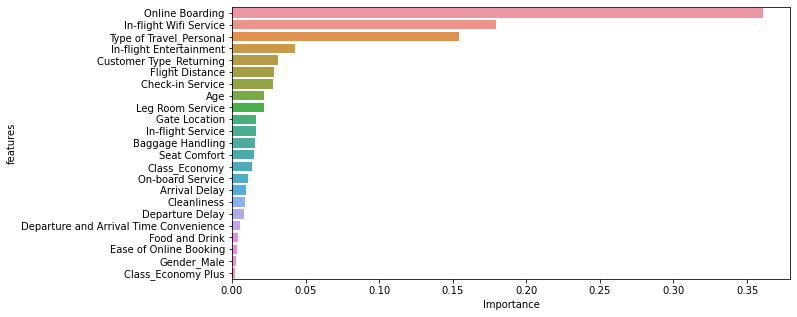

In [37]:
# checking the significance of independent features
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})
feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

In [38]:
# random forest classifier
print("Random Forest Classifier")
rf = RandomForestClassifier()

## call the function
fit_n_print(rf, X_train, X_test, y_train, y_test)

Random Forest Classifier
Train accuracy:  0.9999889673433363
Test accuracy:  0.962905758488429
Confusion matrix: 
 [[15938   958]
 [  483 21468]]


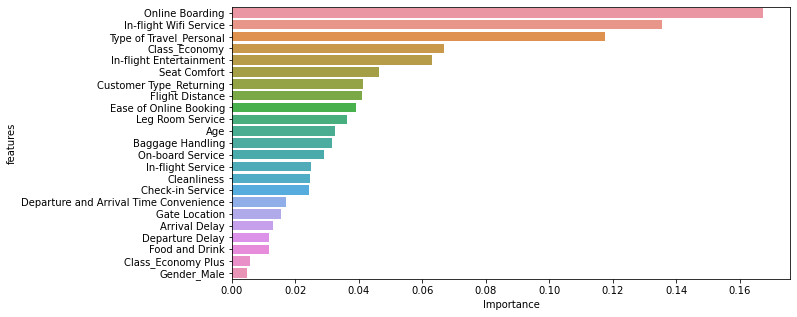

In [39]:
# checking the significance of independent features
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

# Hence, we can conclude that the independent features "Online Boarding" is has the greatest significance in predicting the passenger satisfaction.